# Определение петли гистерезиса ферроманетика магнитооптическим методом
### Лабораторная работа № 12

# Экспериментальная часть

Измерение петли гистререзиса производится магнитооптическим методом с использованием эффекта Фарадея, который заключается во вращении плоскости поляризации света при прохождении через намагниченное вещество.  

Блок-схема установки представленна на рисунке ниже:

<img src="setup.png" width=40%>

1) лазер
2) образец
3) катушка
4) анализатор
5) фотоприёмник
6) усилитель
7) амперметр
8) резистор
9) осциллограф


## Получение гистерезиса на осциллографе

Соберём установку согласно схеме. Для начала воспользуемся лабораторным осциллографом. Включим установку и получим на осциллографе изображение гистерезиса. Начнём вращать анализатор, заметим что размер гистерезиса меняется, размер гистерезиса будем максимальными когда угол $ \gamma $ между осями поляризации и анализатора будет равен $\gamma = 45^o$ 

## Измерение данных при помощи АЦП

Для снятия данных подключим выходы к АЦП. Максимальное напряжение считываемое АЦП равно 5 В. Чтобы не превысить это напряжение выставим нужный коэффициент усиления на усилистеле, споротивление резистора R = 1.8 Ом. Далее по полученными данным построим график


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 100
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [3]:
with open("kartashov.csv") as f:
    data = pd.read_csv(f)

In [4]:
2.5 / 2 ** 0.5

1.7677669529663687

0.03145248127340825 0.06586395131086142


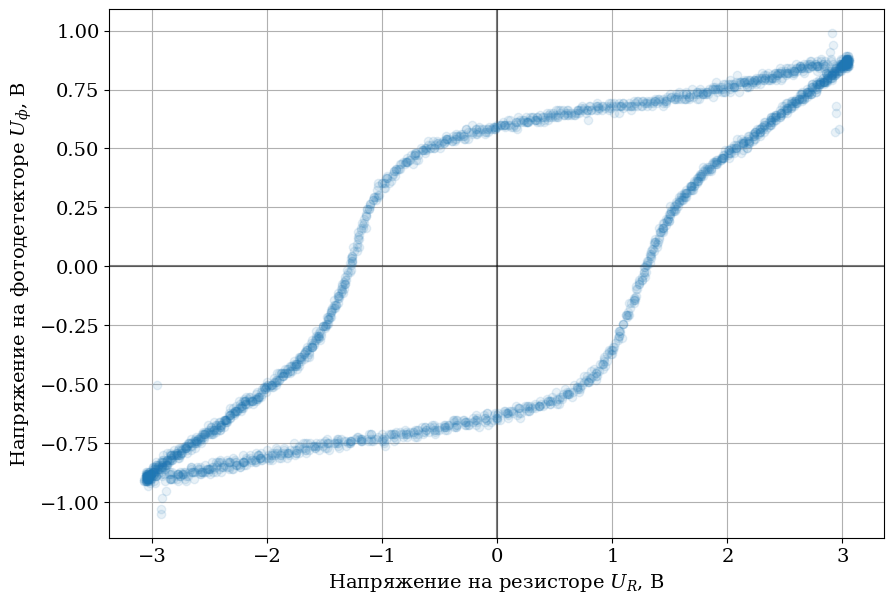

In [9]:
x = data.y # напряжение на резисторе 
y = data.x # напряжение на фотодетекторе

print(np.mean(x), np.mean(y))
# x = x - np.mean(x)
y = y - np.mean(y)

plt.scatter(x, y, alpha=0.1, zorder=3)

plt.xlabel("Напряжение на резисторе $U_R$, В")
plt.ylabel("Напряжение на фотодетекторе $U_ф$, В")
plt.axvline(color="black", alpha=0.5)
plt.axhline(color="black", alpha=0.5)

plt.savefig("plot_1.pdf")

## Рассчёт коэрцитивной силы и поля нассыщения

По напряжениею на реисторе рассчитаем ток в катушке. Напряжённость магнитного поля найдём из коэффициента калибровки катушки 150 Э/А

1.0606601717798212
0.03145248127340825 0.06586395131086142


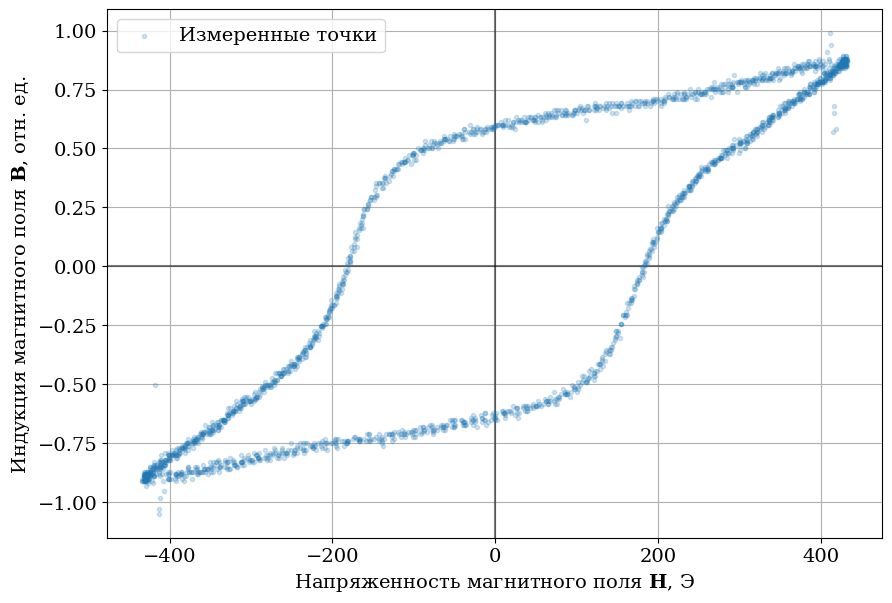

In [16]:
x = data.y # напряжение на резисторе 
y = data.x # напряжение на фотодетекторе

R = 3/ (2 * 2 ** 0.5) # сопротивление резистора
print(R)

print(np.mean(x), np.mean(y))
# x = x - np.mean(x)
y = y - np.mean(y)
x = x / R # I = U/R
x = 150 * x # H = I * 150 E/A

plt.scatter(x, y, alpha=0.2, zorder=3, marker='.', label="Измеренные точки")


plt.xlabel("Напряженность магнитного поля $\mathbf{H}$, Э")
plt.ylabel("Индукция магнитного поля $\mathbf{B}$, отн. ед.")
plt.axvline(color="black", alpha=0.5)
plt.axhline(color="black", alpha=0.5)

# plt.axvline(x = -110, color="black", alpha=0.3, ls='--')
# plt.text(-110, 0 , "$-H_C$", ha="right", va="bottom")
# plt.axvline(x = 110, color="black", alpha=0.3, ls='--')
# plt.text(110, 0 , "$H_C$", ha="right", va="bottom")
# plt.axvline(x = 260, color="black", alpha=0.3, ls='--')
# plt.text(260, 0 , "$-H_S$", ha="right", va="bottom")
# plt.axvline(x = -260, color="black", alpha=0.3, ls='--')
# plt.text(-260, 0 , "$-H_S$", ha="right", va="bottom")

# plt.xlim((-300, 300))

plt.legend()
plt.savefig("plot_2.pdf")

По графику видим, что коэр цитивная сила по модулю примерно равна 110 Э, поле насыщения по модулю примерно равно 260 Э.  
Убедимся в действительности этого проанализировав измеренные данные

In [21]:
# Значения напряжённости магнитного поля при которых напряжение с фотодетектора по модулю меньше порогового значения
x[np.abs(y) < 0.04]

0       110.622613
99     -110.622613
200     110.622613
299    -108.136426
400     110.622613
499    -108.136426
600     109.791056
699    -108.967983
800     109.791056
801     113.312447
899    -107.304868
1000    108.136426
1099   -107.304868
1200    108.136426
1299   -108.136426
1400    108.967983
1499   -107.304868
1700   -108.967983
1800    108.136426
1801    111.454171
1899   -107.304868
1900   -109.791056
2000    108.136426
2001    112.277243
2100   -110.622613
Name: y, dtype: float64

Видим что коэцитивная сила действительно примерно равна 110 Э с разбросом в +- 3 Э

In [20]:
# максимальное минимальное значение напряжённости магнитного поля
np.max(x), np.min(x)

(259.36111048497617, -260.1926680596515)

Видим, что минимальное и максимальное значение по модулю равны 260 Э, возможно при увеличении амплитуды удастся найти более точное значение поля насыщения